# 1. Setup

> ## 1.1 Import Libraries

First, we import python modules required for data wrangling, exploratory data analysis, model building and data visualization.

In [4]:
#data manipulation and visualization libraries
import os
import time
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
from matplotlib.figure import Figure
import seaborn as sns
import plotly
import plotly.express as px
from warnings import filterwarnings

#data prepocessing and classic ML libraries

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier  

#for imbalanced classification
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier

#neural network libraries
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.metrics import AUC

np.random.seed(123)
filterwarnings('ignore')
pd.set_option('display.float_format', lambda num:'%1.3f'%num)
pd.set_option('display.max_columns', 99)
sns.set()

In [5]:
#!pip install xgboost

> ## 1.2. Load Datasets

To get started, the provided datasets are loaded as pandas dataframes.

In [58]:
df = pd.read_csv("train.csv")
df.head(100)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000,0.083,0,5.837
1,2,1,20,50,0.034,18.383,0,5.908
2,3,1,20,50,0.068,22.509,0,7.876
3,4,1,20,50,0.102,22.809,0,11.743
4,5,1,20,50,0.136,25.356,0,12.235
...,...,...,...,...,...,...,...,...
95,96,2,20,20,0.510,7.962,0,15.047
96,97,2,20,20,0.544,7.906,0,15.117
97,98,2,20,20,0.578,8.244,0,14.696
98,99,2,20,20,0.612,7.344,0,15.820


> ## 2.1 Summary Statistics

In [39]:
print(df.describe())
print(df.info())

               id   breath_id   time_step        u_in    pressure
count 6036000.000 6036000.000 6036000.000 6036000.000 6036000.000
mean  3018000.500   62838.859       1.307       7.322      11.220
std   1742443.257   36335.256       0.766      13.435       8.110
min         1.000       1.000       0.000       0.000      -1.896
25%   1509000.750   31377.000       0.643       0.394       6.330
50%   3018000.500   62765.500       1.308       4.386       7.033
75%   4527000.250   94301.000       1.966       4.984      13.641
max   6036000.000  125749.000       2.937     100.000      64.821
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          object 
 3   C          object 
 4   time_step  float64
 5   u_in       float64
 6   u_out      bool   
 7   pressure   float64
dtypes: bool(1), float64(3), int64(2), object(2)
memor

> ## 1.3. Aggregate Datasets

Data from different csv files are aggregated to form a single dataset. Further analyses will be performed on this combined dataset.

# 2. Data Wrangling

> ## 2.1 Missing Values

Dataset can often contain missing values in the form of NaN or Null entries. Since most machine learning models cannot deal with the missing values by themselves, it's essential to be done manually before fitting the data into a model.

In [40]:
print(df.isnull().sum())

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64


> ## 2.2 Treating Data types

In [59]:
df_copy = df.copy()
df_copy['u_out'] = df['u_out'].astype(object)
df_copy['R'] = df['R'].astype(object)
df_copy['C'] = df['C'].astype(object)

> ## 2.3 Scaling numerical features

In [61]:
numeric_col = ['u_in']
features = df_copy[numeric_col]
Scaler = MinMaxScaler()
df_copy[numeric_col] = Scaler.fit_transform(features)

>## 2.4 Encoding Categorical Features

In [62]:
categorical_col = ['C','R']
#label_encoder = LabelEncoder()
#label_encoder = OneHotEncoder()

for col in categorical_col:
    #df_copy[col] = label_encoder.fit_transform(df_copy[col])
    df_copy[col] = df_copy[col].astype(str)

df_copy["R_C"] = df_copy["R"].astype(str) + '_' + df_copy["C"].astype(str)
df_copy = pd.get_dummies(df_copy) #convert str to indicator variables

In [63]:
df_copy.head()

,id,breath_id,time_step,u_in,pressure,R_20,R_5,R_50,C_10,C_20,C_50,u_out_0,u_out_1,R_C_20_10,R_C_20_20,R_C_20_50,R_C_50_10,R_C_50_20,R_C_50_50,R_C_5_10,R_C_5_20,R_C_5_50
0,1,1,0.000,0.001,5.837,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
1,2,1,0.034,0.184,5.908,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
2,3,1,0.068,0.225,7.876,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
3,4,1,0.102,0.228,11.743,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,5,1,0.136,0.254,12.235,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0


# 3. Exploratory Data Analysis

> ## 3.1 Summary Statistics

In [64]:
print(df_copy.describe())
print(df_copy.info())

               id   breath_id   time_step        u_in    pressure        R_20  \
count 6036000.000 6036000.000 6036000.000 6036000.000 6036000.000 6036000.000   
mean  3018000.500   62838.859       1.307       0.073      11.220       0.271   
std   1742443.257   36335.256       0.766       0.134       8.110       0.445   
min         1.000       1.000       0.000       0.000      -1.896       0.000   
25%   1509000.750   31377.000       0.643       0.004       6.330       0.000   
50%   3018000.500   62765.500       1.308       0.044       7.033       0.000   
75%   4527000.250   94301.000       1.966       0.050      13.641       1.000   
max   6036000.000  125749.000       2.937       1.000      64.821       1.000   

              R_5        R_50        C_10        C_20        C_50     u_out_0  \
count 6036000.000 6036000.000 6036000.000 6036000.000 6036000.000 6036000.000   
mean        0.329       0.399       0.372       0.301       0.327       0.380   
std         0.470       0.4

> ## 3.2 Data Visualization

### Distribution of R and C value

In [65]:
print(df.groupby(['breath_id','R','C']).size())
print(df.groupby(['R','C']).size())

breath_id  R   C 
1          20  50    80
2          20  20    80
3          50  20    80
4          50  50    80
5          5   50    80
                     ..
125740     50  50    80
125742     20  10    80
125743     20  10    80
125745     50  50    80
125749     50  10    80
Length: 75450, dtype: int64
R   C 
5   10     664960
    20     662160
    50     661680
20  10     485600
    20     496640
    50     654880
50  10    1094160
    20     660800
    50     655120
dtype: int64


         count
R  C          
20 10   485600
   20   496640
   50   654880
50 50   655120
   20   660800
5  50   661680
   20   662160
   10   664960
50 10  1094160


<AxesSubplot:xlabel='R'>

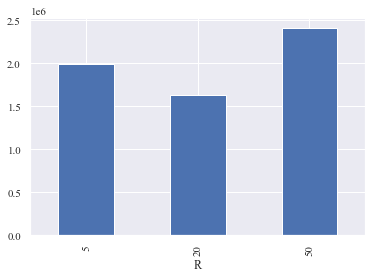

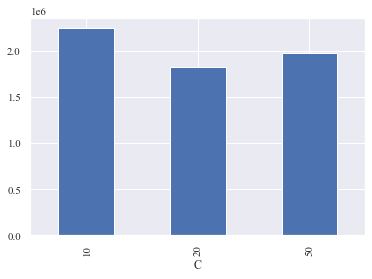

<Figure size 432x288 with 0 Axes>

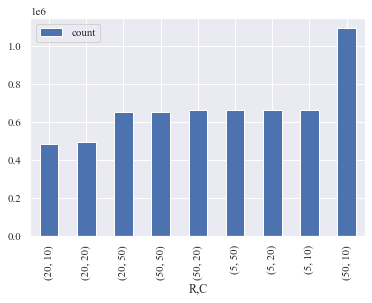

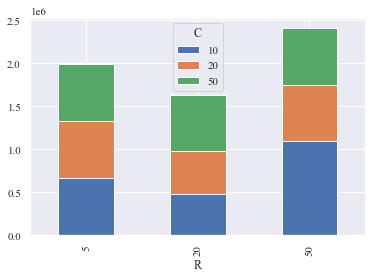

In [66]:
#plot R value
plt.figure()
f1=df.groupby(['R']).size().plot(kind = 'bar')

#plot C value
plt.figure()
df.groupby(['C']).size().plot(kind = 'bar')

#plot pair of R-C value
RC_value = df.groupby(['R'])['C'].value_counts().sort_values(ascending=True).to_frame('count')
print(RC_value)
plt.figure()
RC_value.plot.bar(stacked = True)

#stacked plot with base of R, stacked in C
rc = RC_value.pivot_table(index='R', columns='C', values='count')
rc.plot.bar(stacked = True)

### Distribution of pressure (responding variable)

pressure
-1.896      3
-1.825     69
-1.755    217
-1.685    431
-1.615    389
         ... 
64.540      8
64.610     14
64.680     13
64.751      9
64.821    871
Length: 950, dtype: int64


<AxesSubplot:xlabel='pressure'>

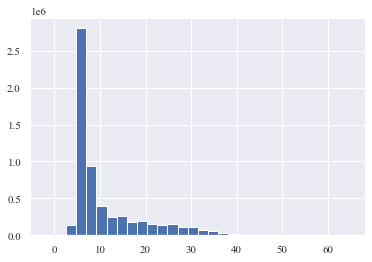

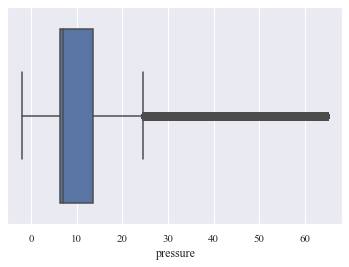

In [69]:
print(df_copy.groupby(['pressure']).size())
plt.hist(df['pressure'],bins = 30)

#boxplot
plt.figure()
sns.boxplot(df_copy['pressure'])


### Distribution of u_in and u_out

In [23]:
print(df_copy2.groupby(['u_out']).size())

u_out
False    2290968
True     3745032
dtype: int64


<AxesSubplot:>

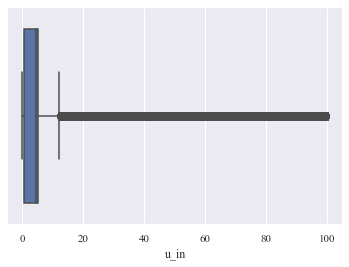

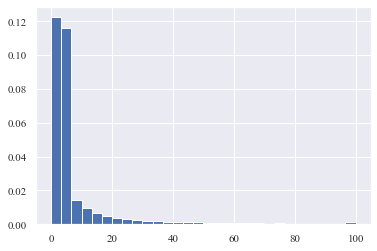

In [32]:
plt.figure()
sns.boxplot(df['u_in'])

plt.figure()
df['u_in'].hist(density = True, bins = 30)

In [34]:
df_copy = df.copy()
df_copy['u_in'] = df['u_in'].apply(lambda x: np.log(x + 0.000001))

<AxesSubplot:>

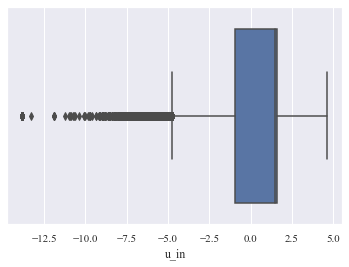

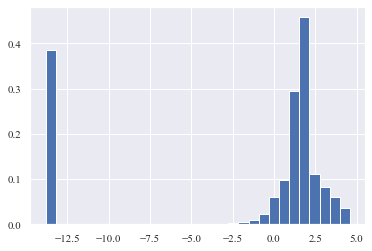

In [35]:
plt.figure()
sns.boxplot(df_copy['u_in'])

plt.figure()
df_copy['u_in'].hist(density = True, bins = 30)

In [37]:
Scaler = MinMaxScaler()
df_copy['u_in'] = Scaler.fit_transform(df_copy[['u_in']])

<AxesSubplot:>

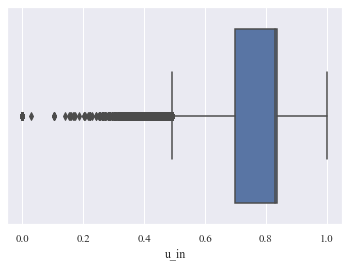

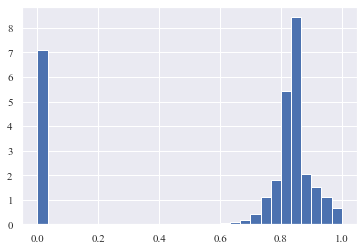

In [38]:
plt.figure()
sns.boxplot(df_copy['u_in'])

plt.figure()
df_copy['u_in'].hist(density = True, bins = 30)

### correlation plot

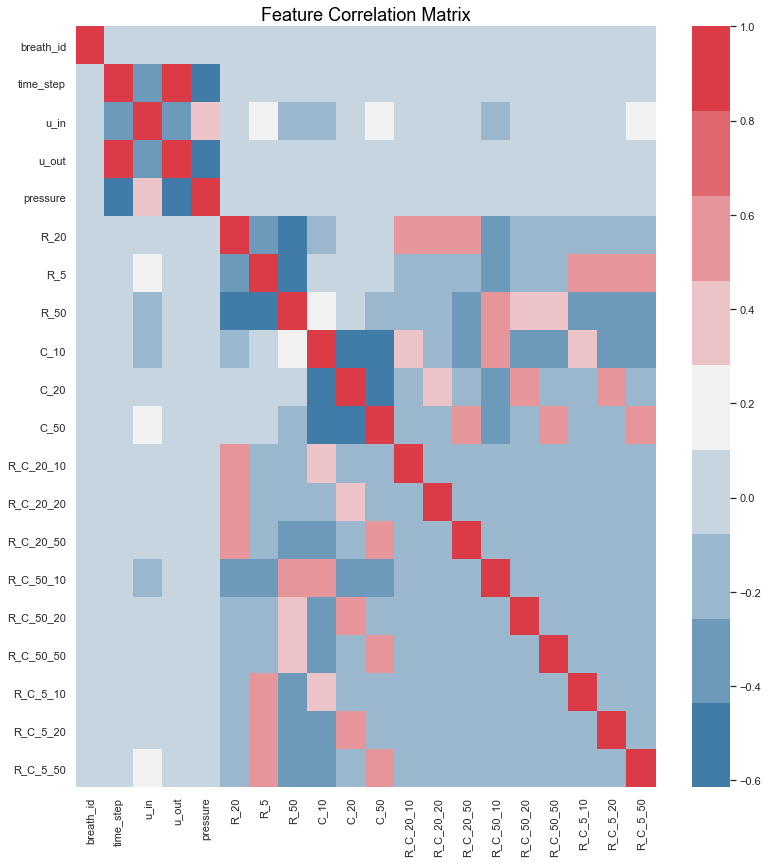

In [20]:
fig = plt.figure(figsize=(13,14))
sns.heatmap(df_copy2.iloc[:,1:].corr(),annot=False,fmt=".2f", cmap = sns.diverging_palette(240, 10, n=9))
plt.rcParams["font.family"] = "Times New Roman"
plt.title('Feature Correlation Matrix', fontsize=18, color='black')
plt.xticks()
plt.yticks()
plt.show()

> ## 3.3 Feature Generation

In [ ]:
def add_features(df):
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
    df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
    df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
    df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
    #df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
    df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
    df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    #df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)
    #df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
    df = df.fillna(0)
    
    df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    #df['breath_id__u_out__max'] = df.groupby(['breath_id'])['u_out'].transform('max')
    df['breath_id__u_in__mean'] = df.groupby(['breath_id'])['u_in'].transform('mean')#1
    
    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    df['u_out_diff1'] = df['u_out'] - df['u_out_lag1']
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    df['u_out_diff2'] = df['u_out'] - df['u_out_lag2']
    
    df['breath_id__u_in__diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']
    
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    #df['u_out_diff3'] = df['u_out'] - df['u_out_lag3']
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']
    #df['u_out_diff4'] = df['u_out'] - df['u_out_lag4']
    df['cross']= df['u_in']*df['u_out']
    df['cross2']= df['time_step']*df['u_out']
    
    #add in
    #df['one'] = 1
    #df['count'] = (df['one']).groupby(df['breath_id']).cumsum()
    #df['u_in_cummean'] =df['u_in_cumsum'] /df['count']#2
    df['breath_id_lag']=df['breath_id'].shift(1).fillna(0)#3
    df['breath_id_lag2']=df['breath_id'].shift(2).fillna(0)#4
    df['breath_id_lagsame']=np.select([df['breath_id_lag']==df['breath_id']],[1],0)
    df['breath_id_lag2same']=np.select([df['breath_id_lag2']==df['breath_id']],[1],0)
    #df['breath_id__u_in_lag'] = df['u_in'].shift(1).fillna(0)
    #df['breath_id__u_in_lag'] = df['breath_id__u_in_lag'] * df['breath_id_lagsame']
    #df['breath_id__u_in_lag2'] = df['u_in'].shift(2).fillna(0)
    #df['breath_id__u_in_lag2'] = df['breath_id__u_in_lag2'] * df['breath_id_lag2same']
    
    
    df['u_in_lagback_diff1'] = df['u_in'] - df['u_in_lag_back1']
    #df['u_out_lagback_diff1'] = df['u_out'] - df['u_out_lag_back1']
    df['u_in_lagback_diff2'] = df['u_in'] - df['u_in_lag_back2']
    #df['u_out_lagback_diff2'] = df['u_out'] - df['u_out_lag_back2']
    
    df['ewm_u_in_mean'] = (df\
                           .groupby('breath_id')['u_in']\
                           .ewm(halflife=9)\
                           .mean()\
                           .reset_index(level=0,drop=True))
    #df[["15_in_sum","15_in_min","15_in_max","15_in_mean"]] = (df\
    #                                                          .groupby('breath_id')['u_in']\
    #                                                          .rolling(window=15,min_periods=1)\
    #                                                          .agg({"15_in_sum":"sum",
    #                                                                "15_in_min":"min",
    #                                                                "15_in_max":"max",
    #                                                                "15_in_mean":"mean"})\
    #                                                           .reset_index(level=0,drop=True))
    #---
    
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df['R__C'] = df["R"].astype(str) + '__' + df["C"].astype(str)
    df = pd.get_dummies(df)
    #df.drop(['one','count'],axis=1)
    return df

In [71]:
df_copy.to_csv('train_std.csv', index = False)

KeyboardInterrupt: 